In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [20]:
def getdata(ifile, x, y, z, time):
    size  = time*z*y*x
    shape = (time,z,y,x)

    data = np.fromfile(file=ifile, dtype = 'float32', count=size)

    data = data.reshape(shape)
 
    data = data.byteswap()
    return data

Input folder:

In [21]:
ls ../MITgcm_c65p/verification/mytest/input/

bathymetry.bin  data.pkg       lev_sss.bin    trenberth_taux.bin
CVS/            data.ptracers  lev_sst.bin    trenberth_tauy.bin
data            eedata         lev_t.bin
data.gmredi     eedata.mth     ncep_emp.bin
data.mnc        lev_s.bin      ncep_qnet.bin


### Bathymetry

In [23]:
data = getdata('../MITgcm_c65p/verification/mytest/input/bathymetry.bin',90,40,1,1)

In [24]:
data.shape

(1, 1, 40, 90)

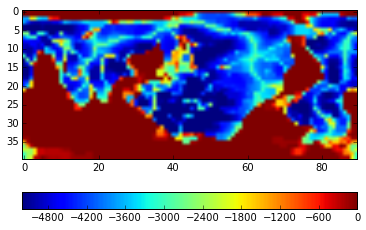

In [26]:
plt.imshow(data[0,0,:,:])
plt.colorbar(orientation = 'horizontal');

So data have to be interpolated on the model grid

### Climatology

Let's find out how many timesteps we have in the climatology field

In [30]:
ls -l ../MITgcm_c65p/verification/mytest/input/lev_t.bin

-rw-rw-r-- 1 ocean ocean 2592000 Nov 11 10:49 ../MITgcm_c65p/verification/mytest/input/lev_t.bin


The size of the climatology is 2592000 bytes

In [31]:
2592000/90./40./15./4.

12.0

We have 12 values

In [32]:
clima = getdata('../MITgcm_c65p/verification/mytest/input/lev_t.bin', 90,40,15,12)

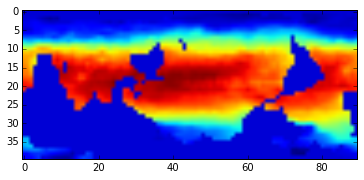

In [33]:
plt.imshow(clima[0,0,:,:])

Different level

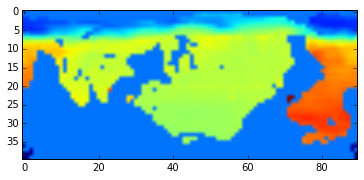

In [35]:
plt.imshow(clima[0,10,:,:])

### Forcing

In [37]:
ls -l ../MITgcm_c65p/verification/mytest/input/trenberth_taux.bin

-rw-rw-r-- 1 ocean ocean 172800 Nov 11 10:49 ../MITgcm_c65p/verification/mytest/input/trenberth_taux.bin


In [39]:
forcing = getdata('../MITgcm_c65p/verification/mytest/input/trenberth_taux.bin', 90,40,1,12)

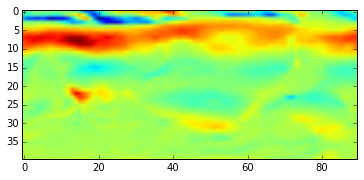

In [41]:
plt.imshow(forcing[5,0,:,:])